# Pymaceuticals Inc.
---

### Analysis
The study was done on balanced gender distribution of the mice with male making up 51% of and female making up 49% of the test group.

Capomulin had the majority of the observed Mice over the timepoints compared to other drug regimen. 
It was observed that Capomulin and Ramicane contributed to the lowest final tumor volume size. However Infubinol had an outlier with its final tumor volume falling well below its lower quartile.

It was also noticed that based on the scatter plot for Mouse Weight vs. Average Tumor Volume for Capomulin, there exists a postive correlation between the two attributes.


 

In [83]:
# Data Analytics and Visualization Bootcamp 
# Student Name: Thet Win
# Module 5 - Data Visualization
# Modified Date: June 1, 2024
# 
# This program assists a pharmaceutical company that specializes in anti-cancer medications
# by analyzing study done on 249 mice that were identified with SCC tumors who received treatment
# with a range of drug regimens.
# Utilizing Pandas functionalities to produce bar chart, pie chart, box plots and scatter plots, 
# analysis was carried out to determine correlations, liner regression and outliers.
# The results obtained compare the performance of Pymaceutical's drug of interest, Capomulin against the other 
# treatment regimens.

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Rearrange the columns
combined_df = combined_df[[
    'Mouse ID',
    'Timepoint',
    'Tumor Volume (mm3)',
    'Metastatic Sites',
    'Drug Regimen',
    'Sex',
    'Age_months',
    'Weight (g)']]

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [85]:
# Checking the number of mice.
ttl_mice = len(pd.unique(combined_df['Mouse ID']))
ttl_mice


249

In [86]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Create a Custom ID column that combines Mouse ID and Timepoint
combined_df['Mouse Timepoint ID']=combined_df['Mouse ID'] + combined_df['Timepoint'].astype(str)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_array = combined_df[combined_df.duplicated(['Mouse Timepoint ID'], keep=False)]
dups_array = pd.unique(dups_array['Mouse ID'])
dups_array

array(['g989'], dtype=object)

In [87]:
# Optional: Get all the data for the duplicate mouse ID. 
# Convert the array to DataFrame
dups_df = pd.DataFrame(dups_array)

# Rename the first Column to Mouse ID - For Merge purposes
dups_df = dups_df.rename(columns={dups_df.columns[0]: 'Mouse ID'})

# Left join dups df to get the columns from combined df to get all columns of dups data
dups_data_df = pd.merge(dups_df, combined_df, how='left', on='Mouse ID')

# Display the data
dups_data_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse Timepoint ID
0,g989,0,45.000000,0,Propriva,Female,21,26,g9890
1,g989,0,45.000000,0,Propriva,Female,21,26,g9890
2,g989,5,48.786801,0,Propriva,Female,21,26,g9895
3,g989,5,47.570392,0,Propriva,Female,21,26,g9895
4,g989,10,51.745156,0,Propriva,Female,21,26,g98910
5,g989,10,49.880528,0,Propriva,Female,21,26,g98910
6,g989,15,51.325852,1,Propriva,Female,21,26,g98915
7,g989,15,53.442020,0,Propriva,Female,21,26,g98915
8,g989,20,55.326122,1,Propriva,Female,21,26,g98920
9,g989,20,54.657650,1,Propriva,Female,21,26,g98920


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Remove known duplicates
combined_clean_df = combined_df.drop_duplicates(subset=['Mouse ID'])

# Remove Duplicate Mouse ID based on previous steps's Mouse Timepoint ID
combined_clean_df = combined_clean_df.loc[combined_clean_df['Mouse ID'] != 'g989']

# Display data to check
combined_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse Timepoint ID
0,k403,0,45.0,0,Ramicane,Male,21,16,k4030
10,s185,0,45.0,0,Capomulin,Female,3,17,s1850
20,x401,0,45.0,0,Capomulin,Female,16,15,x4010
30,m601,0,45.0,0,Capomulin,Male,22,17,m6010
40,g791,0,45.0,0,Ramicane,Male,11,16,g7910


In [89]:
# Checking the number of mice in the clean DataFrame.
combined_clean_df_count = len(combined_clean_df['Mouse ID'])
combined_clean_df_count

248

## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#combined_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
summay_stats_mean = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
summay_stats_median = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
summay_stats_variance = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
summay_stats_stdDev = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
summay_stats_stdErr = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Combine the data into one data frame
summay_stats = pd.concat([summay_stats_mean, 
                          summay_stats_median,
                          summay_stats_variance,
                          summay_stats_stdDev,
                          summay_stats_stdErr], axis=1)

# Assign Column Names
summay_stats.columns = ['Mean Tumor Volume', 
                        'Median Tumor Volume', 
                        'Tumor Volume Variance', 
                        'Tumor Volume Std. Dev.', 
                        'Tumor Volume Std. Err.']

# Display results
summay_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summay_stats_agg = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summay_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

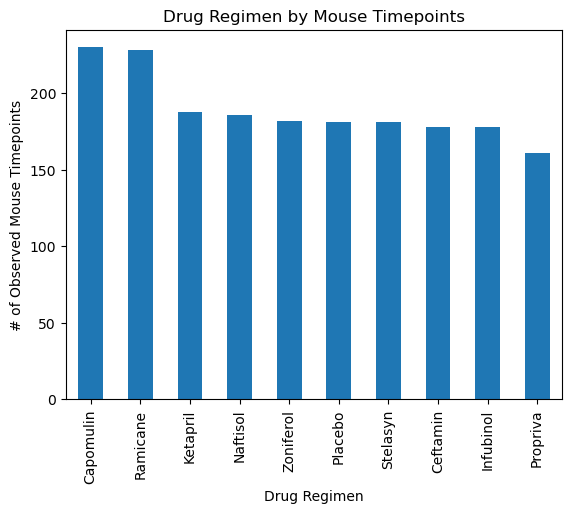

In [92]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of observations per Drug Regimen and sort the results in descending order
Mouse_Timepoint_ID_count = combined_df.groupby(['Drug Regimen'])['Mouse Timepoint ID'].count().sort_values(ascending=False)

# Plot the graph - Drug Regimen (x-axis) by Mouse Timepoints (y-axis)
chart_drugByMouseTimepoint = Mouse_Timepoint_ID_count.plot(kind="bar", title="Drug Regimen by Mouse Timepoints")
chart_drugByMouseTimepoint.set_xlabel("Drug Regimen")
chart_drugByMouseTimepoint.set_ylabel("# of Observed Mouse Timepoints") 


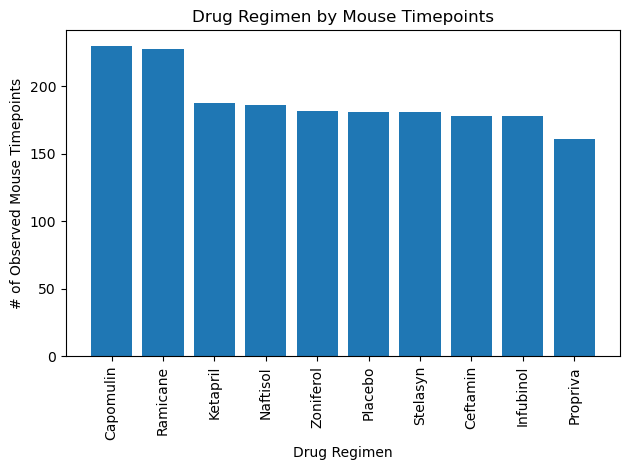

In [93]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Get the labels and values from Series - keys() and values()
seriesLabels = Mouse_Timepoint_ID_count.keys()
seriesValues = Mouse_Timepoint_ID_count.values

# Draw bar chart
plt.bar(seriesLabels, seriesValues)

# Make x ticks labels vertical
plt.xticks(rotation='vertical')

# Set the labels
plt.title("Drug Regimen by Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the graph
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sex')

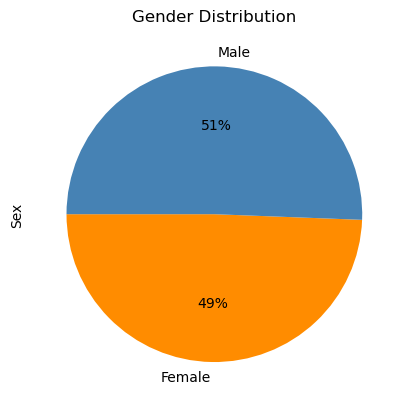

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = combined_df.groupby(['Sex'])['Sex'].value_counts()

# Define colors for each segment
myColors = ['darkorange', 'steelblue']
gender_chart=gender_df.plot(kind='pie', autopct="%1.0f%%",startangle=180, colors=myColors, title="Gender Distribution")
gender_chart.set_ylabel("Sex")
              

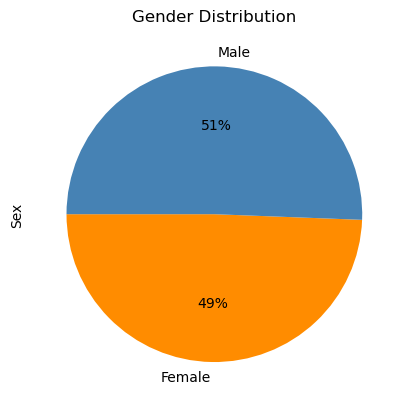

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the labels and values from Series - keys() and values()
seriesLabels_pie = gender_df.keys()
seriesValues_pie = np.array(gender_df.values)

# Draw bar chart
plt.pie(seriesValues_pie, labels=seriesLabels_pie, autopct='%1.0f%%', startangle=180, colors=myColors)

# Set the labels
plt.title("Gender Distribution")
plt.ylabel("Sex")

# Show the pie chart
plt.show()



## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Get the ID of the Maximum Timepoint for each Mouse ID
idx = combined_df.groupby('Mouse ID')['Timepoint'].idxmax()

# Create a Data Frame with Mouse ID's with Maximum Timepoint values
combined_tp_df = combined_df.loc[idx]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Create a data set with Tumor Volume column
tumor_vol_df = combined_tp_df[['Mouse ID', 'Tumor Volume (mm3)','Drug Regimen']]

# Filter only for Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_vol_df = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen']=='Capomulin') |
                                (tumor_vol_df['Drug Regimen']=='Ramicane') |
                                (tumor_vol_df['Drug Regimen']=='Infubinol') |
                                (tumor_vol_df['Drug Regimen']=='Ceftamin') ]

In [97]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol_Capomulin = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen']=='Capomulin')]
tumor_vol_Ramicane = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen']=='Ramicane')]
tumor_vol_Infubinol = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen']=='Infubinol')]
tumor_vol_Ceftamin = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen']=='Ceftamin')]

# Get the Tumor Volume Data for each treatment series
tumor_vol_Capomulin = tumor_vol_Capomulin['Tumor Volume (mm3)']
tumor_vol_Ramicane = tumor_vol_Ramicane['Tumor Volume (mm3)']
tumor_vol_Infubinol = tumor_vol_Infubinol['Tumor Volume (mm3)']
tumor_vol_Ceftamin = tumor_vol_Ceftamin['Tumor Volume (mm3)']

# add subset
# Create a Dictionary with the Treatments and Tumor Volume Data
tumor_vol_dict = {'Capomulin': tumor_vol_Capomulin,
                   'Ramicane': tumor_vol_Ramicane,
                   'Infubinol': tumor_vol_Infubinol,
                   'Ceftamin': tumor_vol_Ceftamin}

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Analysis for Capomulin
quartiles_Capomulin = tumor_vol_Capomulin.quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin
# Determine outliers using upper and lower bounds
lower_bound_Capomulin = lowerq_Capomulin - (1.5*iqr_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*iqr_Capomulin)

# Analysis for Ramicane
quartiles_Ramicane = tumor_vol_Ramicane.quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane
# Determine outliers using upper and lower bounds
lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)

# Analysis for Infubinol
quartiles_Infubinol = tumor_vol_Infubinol.quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol
# Determine outliers using upper and lower bounds
lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)

# Analysis for Ceftamin
quartiles_Ceftamin = tumor_vol_Ceftamin.quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin
# Determine outliers using upper and lower bounds
lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)


In [98]:
# Extract Outliers - Capomulin
outlier_Capomulin = tumor_vol_Capomulin.loc[(tumor_vol_Capomulin < lower_bound_Capomulin) |
                                  (tumor_vol_Capomulin > upper_bound_Capomulin) ].tolist()

# Extract Outliers - Ramicane
outlier_Ramicane = tumor_vol_Ramicane.loc[(tumor_vol_Ramicane < lower_bound_Ramicane) |
                                  (tumor_vol_Ramicane > upper_bound_Ramicane) ].tolist()

# Extract Outliers - Infubinol
outlier_Infubinol = tumor_vol_Infubinol.loc[(tumor_vol_Infubinol < lower_bound_Infubinol) |
                                  (tumor_vol_Infubinol > upper_bound_Infubinol) ].tolist()

# Extract Outliers - Ceftamin
outlier_Ceftamin = tumor_vol_Ceftamin.loc[(tumor_vol_Ceftamin < lower_bound_Ceftamin) |
                                  (tumor_vol_Ceftamin > upper_bound_Ceftamin) ].tolist()

In [99]:
# Custom Step - Print for each Drug Regimen For analysis purpose - Capomulin
print("------- Capomulin -------")
print(f"The lower quartile of tumor volume for Capomulin is: {lowerq_Capomulin}")
print(f"The upper quartile of tumor volume for Capomulin is: {upperq_Capomulin}")
print(f"The interquartile range of tumor volume for Capomulin is: {iqr_Capomulin}")
print(f"The the median of tumor volume for Capomulin is: {quartiles_Capomulin[0.5]} ")
print(f"Values below {lower_bound_Capomulin}  for Capomulin could be outliers.")
print(f"Values above {upper_bound_Capomulin}  for Capomulincould be outliers.")
print(f"Outliers for Capomulin:  {outlier_Capomulin}")
print(f"")

# Custom Step - For analysis purpose Ramicane
print("------- Ramicane -------")
print(f"The lower quartile of tumor volume for Ramicane is: {lowerq_Ramicane}")
print(f"The upper quartile of tumor volume for Ramicane is: {upperq_Ramicane}")
print(f"The interquartile range of tumor volume for Ramicane is: {iqr_Ramicane}")
print(f"The the median of tumor volume for Ramicane is: {quartiles_Ramicane[0.5]} ")
print(f"Values below {lower_bound_Ramicane}  for Ramicane could be outliers.")
print(f"Values above {upper_bound_Ramicane}  for Ramicane could be outliers.")
print(f"Outliers for Ramicane:  {outlier_Ramicane}")
print(f"")

# Custom Step - For analysis purpose - Infubinol
print("------- Infubinol -------")
print(f"The lower quartile of tumor volume for Infubinol is: {lowerq_Infubinol}")
print(f"The upper quartile of tumor volume for Infubinol is: {upperq_Infubinol}")
print(f"The interquartile range of tumor volume for Infubinol is: {iqr_Infubinol}")
print(f"The the median of tumor volume for Infubinol is: {quartiles_Infubinol[0.5]} ")
print(f"Values below {lower_bound_Infubinol}  for Infubinol could be outliers.")
print(f"Values above {upper_bound_Infubinol}  for Infubinol could be outliers.")
print(f"Outliers for Infubinol:  {outlier_Infubinol}")
print(f"")

# Custom Step - For analysis purpose - Ceftamin
print("------- Ceftamin -------")
print(f"The lower quartile of tumor volume for Ceftamin is: {lowerq_Ceftamin}")
print(f"The upper quartile of tumor volume for Ceftamin is: {upperq_Ceftamin}")
print(f"The interquartile range of tumor volume for Ceftamin is: {iqr_Ceftamin}")
print(f"The the median of tumor volume for Ceftamin is: {quartiles_Ceftamin[0.5]} ")
print(f"Values below {lower_bound_Ceftamin}  for Ceftamin could be outliers.")
print(f"Values above {upper_bound_Ceftamin}  for Ceftamin could be outliers.")
print(f"Outliers for Ceftamin:  {outlier_Ceftamin}")
print(f"")



------- Capomulin -------
The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of tumor volume for Capomulin is: 7.781863460000004
The the median of tumor volume for Capomulin is: 38.1251644 
Values below 20.70456164999999  for Capomulin could be outliers.
Values above 51.83201549  for Capomulincould be outliers.
Outliers for Capomulin:  []

------- Ramicane -------
The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
The the median of tumor volume for Ramicane is: 36.56165229 
Values below 17.912664470000003  for Ramicane could be outliers.
Values above 54.30681135  for Ramicane could be outliers.
Outliers for Ramicane:  []

------- Infubinol -------
The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tum

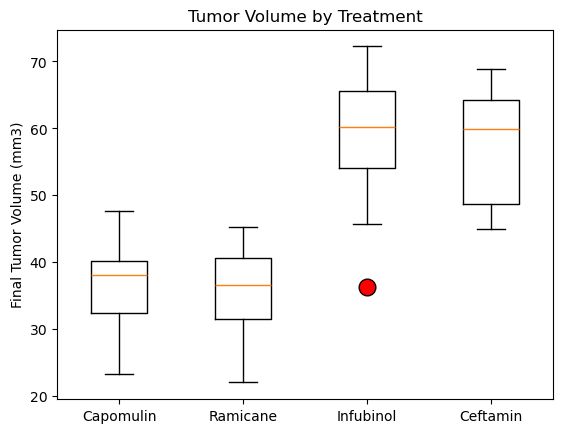

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')

# Formatting the marker
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='solid', markeredgecolor='black')

# Draw Box Plots from Tumor Volume Dictionary
ax1.boxplot(tumor_vol_dict.values(), flierprops=flierprops)
ax1.set_xticklabels(tumor_vol_dict.keys())
plt.show()

## Line and Scatter Plots

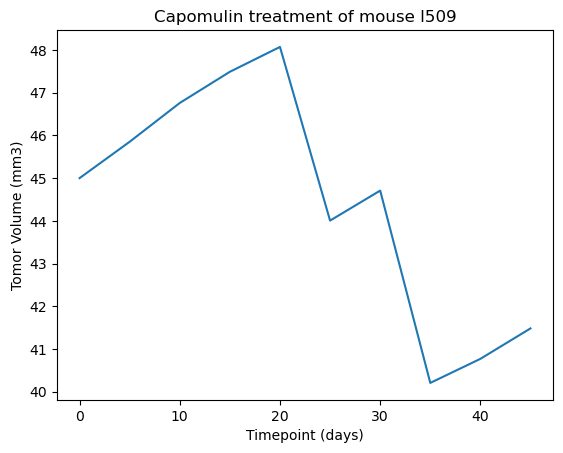

In [101]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Create Dataset for Mouse ID l509
capomulin_df = combined_df.loc[(combined_df['Drug Regimen']=='Capomulin') & (combined_df['Mouse ID']=='l509')]

# Set data sets for each axis
x_axis_timepoint = capomulin_df['Timepoint']
y_axis_tumorVol = capomulin_df['Tumor Volume (mm3)']

# Plot the graph
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tomor Volume (mm3)")
plt.plot(x_axis_timepoint,y_axis_tumorVol)

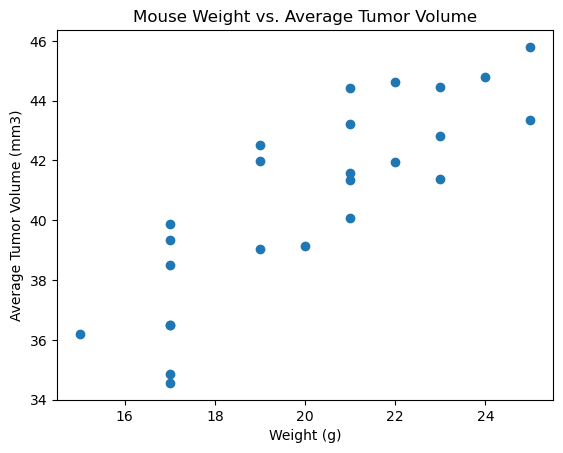

In [102]:
# Gather data for Capomulin
capomulin_ttl_df = combined_df.loc[(combined_df['Drug Regimen']=='Capomulin')]

# Dataset of Mean values for each Mouse ID for Capomulin regimen
capomulin_ttl_avg_df = capomulin_ttl_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Dataset for Age_months
weight_df =  capomulin_ttl_df.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(weight_df,capomulin_ttl_avg_df)

## Correlation and Regression

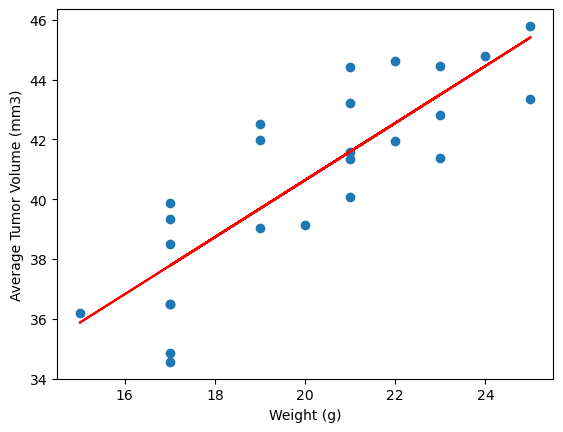

In [103]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(weight_df, capomulin_ttl_avg_df)
p_fit = p_slope * weight_df + p_int
plt.scatter(weight_df,capomulin_ttl_avg_df)
plt.plot(weight_df,p_fit, linestyle='solid', color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()